# Slants Python API: Complete User Guide
### Rachit Jas, Jie Ding - 10/06/2019

The purpose of this document is to familiarize the user with the easy-to-use Python API for the SLANTS algorithm, as proposed by **Quiyi Han, Jie Ding, Edoardo M. Airoldi and Vahid Tarokh** in their work in _IEEE Transactions on Signal Processing 65 (19), 4994-5005_, by exposing the underlying convenience API via a step-by-step approach. This hands-on guide has been prepared in a manner such that the user can easily follow along to get a sense of how to utiize the Slants API for their personal anaytical studies. A demonstration accompanies every detailed description section of the API method in consideration to ensure that the user understands the use case of that specific method. This guide assumes that the user has already installed the latest 'slants' package from the PyPI.org website.

<a name="top"></a>
## Table of Contents
1. [Importing Dependencies](#depen)
    1. [Fundamental API Classes](#funda)
2. [Experiment: a data loader class for synthetic experiments](#exp)
    1. [Experiment.load()](#expload)
3. [Model: a wrapper for applying SLANTS and graphing diagnostic plots](#mod)
    1. [Model Object Instantiation + Available Methods](#modinstant)
    2. [Mode.fit()](#modfit)
        1. [Demonstration](#demo)
        2. [Model Fitting](#fit)
        3. [Function Parameters](#funcparams)
        4. [Critical Tunable Model Parameters - (Order-Specific)](#critical)
        5. [Optional Tunable Model Parameters](#optional)
        6. [Note About Streaming Data](#streaming)
    3. [Model.plot()](#plot)
        1. [Coefficients Plot](#coefplot)
        2. [Optimal $\tau$ Plot](#tauplot)
        3. [Optimal $\lambda$ Plot](#lambdaplot)
        4. [Trace of Nonlinear Functions Plot](#traceplot)
    4. [Model.model_params()](#modparams)
    5. [Model.reset_model()](#modreset)
    6. [Model.help()](#modhelp)
        1. [Show List of Available Methods in Model Class API](#helpls)
        2. [View Documentation of Model Class API](#helpdoc)
        3. [View Documentation of the Entire Class](#helpclass)
        4. [Interactive Prompt](#helpprompt)
4. [Conclusion - To Wrap Things Up](#conc)

<a name="depen"></a>
## 1. Importing Dependencies 

The Slants Python API can be directly invoked in a Python script or a REPL interactve environment by using the familiar **'import'** statement as follows: 

In [1]:
import slants as sl


....................................................................................................
.                                                                                                  .
.    _____ ___             __        _____________________________________________________________ .
.   / ___//  /____  ____  / /______  |   SEQUENTIAL ADAPTIVE NONLINEAR MODELING OF TIME SERIES   | .
.   \__ \/  // __ `/ __ \/ __/ ___/  |   Qiuyi Han, Jie Ding, Edoardo M. Airoldi, Vahid Tarokh   | .
.  ___/ /  // /_/ / / / / /_(__  )   | IEEE Transactions on Signal Processing 65 (19), 4994-5005 | .
. /____/__/ \__,_/_/ /_/\__/____/    |___________________________________________________________| .
.                                                                                                  .
....................................................................................................
.                                                                                         

Upon successful import of the 'slants' package, a prompt displaying the package name should appear on the screen, as shown above. Before we go ahead, please remember that <ins>the project abides by the GNU GPLv3 license terms and conditions. Kindly do take your time to familiarize with the license agreements governing the project, if you haven't done so.</ins>

In order to make your code slightly more readable by escaping the redundant utilization of module aliases (`sl` in this case), you may also use the **'from ... import'** syntax, as follows:    

In [2]:
from slants import Model

Here, we have imported the **Model** Class API, which provides model fitting and plot graphing features to implement the Slants algorithm on your data. We shall cover the **Model** Class in much more detail in the upcoming section of this guide. Keep in mind that the above **'from ... import'** syntax can be used to import specific classes from the 'slants' package.  

<a name="funda"></a>
#### 1.A. Fundamental API Classes

The Slants Python API primarily provides two important classes:
- <ins>**Model:**</ins> A convenience class (that you'll be using the most) which encapsulates the underlying implementation of the SLANTS algorithm and provides you with **model fitting and plot graphing features**. It also handles **data preprocessing** (standardization + transformation) inherently to save the user some time by preparing the data to make it suitable for the algorithm.   
- <ins>**Experiment:**</ins> A data loader class which **hosts a few synthetic experiments**. This class is initially useful for new users to get a hang of the SLANTS algorithm by using it on sample epxeriments.  

Before getting our hands dirty with the SLANTS algorithm API, let us have a quick look at the Experiment data loader class. Do not hesitate if you make mistakes initially using the API. For some types of errors, whenever applicable, you may be given tips from the 'slants' API on how those mistakes may be rectified. 

[[back to top]](#top)

<a name="exp"></a>
## 2. Experiment: a data loader class for synthetic experiments 

If you are new to using the SLANTS API, we highly suggest you have a look at the **Experiment** Class API. The 'slants' package comes with sample toy experiments comprising datasets already prepared for use with the SLANTS algorithm. The **Experiment** is a utility data-loader class that will quickly set you up with the environment to test the SLANTS algorithm API by loading these sample experiments. 

The **Experiment** Class API simply provides the load() method for loading synthetic experiments data. The **Experiment.load()** function takes the following arguments: 

|<center>Parameter Name</center>|<center>Data Type</center>|<center>Description</center>
| :---: | :---: | :---:
| <center>experiment_num</center> | <center>Scalar</center> | <center>Number ID of the synthetic experiment</center> 

The **Experiment.load()** function returns the following arguments: 

|<center> Parameter Name |<center> Data Type             |<center> Constituents, if any    |<center> Description                                                                                                                                                                                          |
|----------------|-----------------------|-------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|<center> synth_exp_data |<center> Dictionary |<center> -                       |<center> If synthetic experiment data found, returns a dictionary containing data (required and/or optional model-fitting function arguments) about synthetic experiments having items:                      |
|<center> -              |<center> -                     |<center> data                    |<center> Original data matrix, X                                                                                                                                                                              |
|<center> -              |<center> -                     |<center> predict                 |<center> Column to indicate the random variable to be predicted,                                                                                                                                              |
|<center> -              |<center> -                     |<center> maximum_lag             |<center> Maximum lag, L, to be considered                                                                                                                                                                     |
|<center> -              |<center> -                     |<center> spline_info             |<center> Initial spline configuration containing 'order' and 'num_Bsplines'                                                                                                                                   |
|<center> -              |<center> -                     |<center> forget_factor           |<center> comprising ideally decreasing weights in range [0,1] indicating the importance of past values                                                                                        |
|<center> -              |<center> -                     |<center> lambda_init             |<center> LASSO penalty initial value                                                                                                                                                            |
|<center> -              |<center> -                     |<center> tau2_init               |<center> EM decomposition parameter initial value                                                                                                                                                 |
|<center> -              |<center> -                     |<center> sparse_lambda_tolerance |<center> Favors smaller $\lambda$ within spaTol_c tolerance                                                                                                                            |
|<center> -              |<center> -                     |<center> delta_multiplier        |<center> Small step size multiplier, to move along the $\lambda$ channels                                                                                                                     |
|<center> -              |<center> -                     |<center> shrink_step_size        |<center> Adjusts $\lambda$ before they get out of control, recommended to be equal to 'forget_factor' vector values in case of confusion,                                                     |
|<center> -              |<center> -                     |<center> online                  |<center> Boolean to indicate whether online version of SLANTS should be utilized using previous model parameters. Automatically handles situations wherein no past serialized model parameters exist |
|<center> -              |<center> -                     |<center> debug_print             |<center> Boolean to indicate internal status of algorithm involving debug print statements                                                                                                      |
|<center> -              |<center> -                     |<center> test_size               |<center> Number of observations to average prediction error                                                                                                                                       |
|<center> -              |<center> -                     |<center> idle_tau2_tolerance     |<center> Increase $\tau^2$ if it idles for a while                                                                                                                                         |
|<center> -              |<center> -                     |<center> safe_shrink_lambda      |<center> Adjust $\lambda$ before they get out of control                                                                                                                                    |
|<center> -              |<center> -                     |<center> zero_coef_tolerance     |<center> Shrink $\lambda$ if coefficients are 0 for a long time                                                                                                                            |
|<center> -              |<center> -                     |<center> shrink_tau2             |<center> Shrink $\tau^2$                                                                                                                                                                           |
|<center> -              |<center> -                     |<center> random_beta             |<center> Use custom provided beta as initializers for the random coefficients.                                                                                                                  |
|<center> -              |<center> -                     |<center> -                       |<center> These above fields will be used in the **Model.fit()** section of this guide                                                                                                                                    |
|<center> -              |<center> -                     |<center> -                       |<center>  -                                                                                                                                                                                                    |
|<center> -              |<center> Boolean                     |<center> -                       |<center> If synthetic experiment data not found, return False                                                                                                                                                 |

Let us import the **Experiment** class API using the **'from ... import'** syntax as discussed earlier. 

In [3]:
from slants import Experiment

<a name="expload"></a>
At the time of writing this document, 3 synthetic experiment datasets are available for testing. For the purposes of this guide, let's try loading and using the first synthetic experiment.

In [4]:
exp = Experiment.load(1)

On successfully loading a synthetic experiment dataset, a dictionary consisting of the input data to the SLANTS algorithm is now accessible.  

In [5]:
exp

{'data': array([[ 0.7885572 ,  2.32398659],
        [ 0.08451415, -0.20619209],
        [-0.06063754,  1.11021553],
        ...,
        [ 0.53384354,  0.89924243],
        [-0.47007867, -0.6481838 ],
        [ 0.81937683,  0.58306828]]),
 'delta_multiplier': 2.51188643150958,
 'forget_factor': array([1.00000000e+00, 5.00000000e-01, 3.33333333e-01, ...,
        5.00500501e-04, 5.00250125e-04, 5.00000000e-04]),
 'lambda_init': 0.01,
 'maximum_lag': 8,
 'predict': 2,
 'random_beta': array([-0.04650292,  0.09298121,  0.14577629,  0.01452073,  0.04731581,
         0.11134961, -0.07611061, -0.16167278,  0.01744543, -0.04614122,
        -0.11248023,  0.11017069, -0.00289208, -0.03145286,  0.06228388,
         0.07807323, -0.08806504,  0.00828215, -0.01705071, -0.05903621,
        -0.08667934,  0.10924852, -0.09752493, -0.01244223,  0.04761224,
         0.07772675,  0.03214824,  0.00153848, -0.17427595, -0.04113581,
        -0.02236714,  0.09714903,  0.14967759, -0.02276125,  0.04744872,
    

This dictionary output, in general, might seem intimidating, but do not worry. Most of the fields are used to tune the SLANTS algorithm during model fitting. The 'data' field corresponds to the data design matrix on which the SLANTS algorithm will be applied. We shall explore the other fields later on in this guide.

Any field from the synthetic-experiment dataset dictionary, `exp`, can be simply accessed using the generic Python dictionary syntax:  

In [6]:
exp['data'];

With time, it is expected that more synthetic experiment datasets will be added to the package. To query the number of experiment datasets available in the package for testing, a **'?'** query may be passed as an argument to the **Experiment.load()** as follows:   

In [7]:
Experiment.load('?')

3 Synthetic experiments available at this time. Tip: Try using a number in the range [1, 3] as an argument to the Experiment.load() method.


True

[[back to top]](#top)

<a name="mod"></a>
## 3. Model: a wrapper for applying SLANTS and graphing diagnostic plots

The SLANTS algorithm, as proposed in the authors' work, has been abstracted and neatly packaged into the **Model** Class API with a few added utility functionalities. The **Model** Class API provides the following features associated with the algorithm:

1. Online model fitting capabilities on your data
2. Diagnostic plot graphing to view optimal model parameters

The **Model Class** API takes care of the following underlying characteristics of the SLANTS algorithm for you:

1. Creating B-Splines using numerical approximation methods
2. Saving model parameters in a serialized format for persistence and online adaptivity 
3. Low-level abstraction from the EM Group LASSO problem formulation and implementation

It should be noted that the data preprocesssing steps (i.e., data standardization + transformation) to prepare the design matrix for the algorithm (as mentioned on page 4995 in the authors' paper, source: _IEEE Transactions On Signal Processing journal_) is inherently handled by the Model Class API. This saves you a lot of time and trouble in preparing the dataset in the correct format so as to be accepted as input by the raw SLANTS algorithm implementation.   

Finally, let's get hands-on with the SLANTS API. 

[[back to top]](#top)

<a name="modinstant"></a>
### 3.A. Model Object Instantiation + Available Methods

An object created from the **Model** Class is an independent instance that can be used to fit the model on the data. This object can be instantiated as follows: 

In [8]:
# After importing Model class, as in the 'Importing Dependencies' section
model = Model()

The available methods present in the **Model** object can be viewed by setting the **'ls'** argument (motivated by the UNIX 'ls' shell command) in the **Model.help()** method of the Model object:

In [9]:
model.help(ls=True)

Here are the list of available methods: 
	 fit | help | model_params | plot | reset_model


True

It's time for us to explore the above **Model** Class API methods one at a time.

[[back to top]](#top)

<a name="modfit"></a>
### 3.B. Model.fit()

The **Model.fit()** method is used for applying the SLANTS algorithm on the data design matrix. This function abstracts the data preprocessing steps we mentioned earlier. To understand the use case as well as get a hang of the **Model.fit()** method, we first provide a small demonstration below. The specifics of the **Model.fit()** method follow this demonstration. 

<a name="demo"></a>
#### 3.B.a. Demonstration

For demonstration purposes, consider the **Synthetic Experiment - (1)** dataset `exp` that we had loaded earlier using the **Experiment** Class API. If you were curious about how the design matrix was created: Each column of the `data` matrix field was generated using the following data generating processes:

$X_{1,t} = \epsilon_{1,t}$

$X_{2,t} = 0.5 X^2_{1,t-1} - 0.8 X_{1,t-7} + \epsilon_{2,t}$  ; where $\epsilon_{1,t}$, $\epsilon_{2,t}$ are i.i.d Standard Gaussian noises.  

Let us have a quick glance at the experiment dataset dictionary:

In [10]:
exp

{'data': array([[ 0.7885572 ,  2.32398659],
        [ 0.08451415, -0.20619209],
        [-0.06063754,  1.11021553],
        ...,
        [ 0.53384354,  0.89924243],
        [-0.47007867, -0.6481838 ],
        [ 0.81937683,  0.58306828]]),
 'delta_multiplier': 2.51188643150958,
 'forget_factor': array([1.00000000e+00, 5.00000000e-01, 3.33333333e-01, ...,
        5.00500501e-04, 5.00250125e-04, 5.00000000e-04]),
 'lambda_init': 0.01,
 'maximum_lag': 8,
 'predict': 2,
 'random_beta': array([-0.04650292,  0.09298121,  0.14577629,  0.01452073,  0.04731581,
         0.11134961, -0.07611061, -0.16167278,  0.01744543, -0.04614122,
        -0.11248023,  0.11017069, -0.00289208, -0.03145286,  0.06228388,
         0.07807323, -0.08806504,  0.00828215, -0.01705071, -0.05903621,
        -0.08667934,  0.10924852, -0.09752493, -0.01244223,  0.04761224,
         0.07772675,  0.03214824,  0.00153848, -0.17427595, -0.04113581,
        -0.02236714,  0.09714903,  0.14967759, -0.02276125,  0.04744872,
    

**<center>The next two code blocks essentially contain code to provide convenience to the reader in the future while observing the Model.fit() function call.</center>** 
    
**<center>Please feel free to skip these two code blocks.</center>** 

All of the fields except the `data` field in the experiment dataset dictionary above correspond to the **tunable model parameters (both, critical and optional)**, which tells the SLANTS algorithm on how to proceed with the model fitting process. Going forward, we save all of these fields in individual variables for slightly more readability. If you are not familiar with the syntax below, fear not. The implementation of this code block is not important.  

In [11]:
# Storing the Experiment dataset fields in their respective variables
def retrieve_tunable_model_params(exp):
    variables = ['data', 'predict', 'maximum_lag', 'spline_info_order', 'spline_info_num_Bsplines', 'forget_factor', 
                 'lambda_init', 'tau2_init', 'sparse_lambda_tolerance','delta_multiplier', 'shrink_step_size', 
                 'test_size', 'safe_shrink_lambda', 'random_beta']
    return [exp[var] for var in variables]

# Calling the function
data, predict, maximum_lag, spline_info_order, spline_info_num_Bsplines, forget_factor, lambda_init, tau2_init, sparse_lambda_tolerance, delta_multiplier, shrink_step_size, test_size, safe_shrink_lambda, random_beta = retrieve_tunable_model_params(exp)

Let us fit a slants model to this **Synthetic Experiment - (1)** dataset. We are concerned with random variable, $X_{2,t}$ here. Before fitting the model on the data directly, we consolidate all of the **optional tunable parameters** into a dictionary for convenience. Since we have the option to provide so many tunable parameters to the **Model** object, it would look ugly to pass all of then at once to the function call. Similarly, the **spline configuration** desired for modeling should also be consolidated for convenience, as shown below:   

In [12]:
# Consolidating parameters from the experiment dataset 
def consolidate_params(test_size, safe_shrink_lambda, random_beta, spline_info_order, spline_info_num_Bsplines):
    optional_params = {
        'test_size': test_size, 
        'safe_shrink_lambda': safe_shrink_lambda, 
        'random_beta': random_beta
    }

    spline_info = {
        'order': spline_info_order, 
        'num_Bsplines': spline_info_num_Bsplines
    }

    return optional_params, spline_info

# Calling the function
optional_params, spline_info = consolidate_params(test_size, safe_shrink_lambda, random_beta, spline_info_order, spline_info_num_Bsplines)

[[back to top]](#top)

<a name="fit"></a>
#### 3.B.b. Model Fitting

Finally, the **Model.fit()** method can be applied to trigger the SLANTS algorithm on the design data matrix, `exp['data']`. The model fitting process is tweaked accordingly as per the tunable parameters we specified in the function call:

In [13]:
# Using the Model() object we created earlier
model.fit(data, predict, maximum_lag, spline_info, forget_factor, 
          lambda_init, tau2_init, sparse_lambda_tolerance,
          delta_multiplier, shrink_step_size, **optional_params) # unpacking optional args; used for readability

==========< Data Preparation Finished >=============
Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 700
Iteration: 800
Iteration: 900
Iteration: 1000
Iteration: 1100
Iteration: 1200
Iteration: 1300
Iteration: 1400
Iteration: 1500
Iteration: 1600
Iteration: 1700
Iteration: 1800
Iteration: 1900
==========< Sequential Nonlinear Model finished >=============


As we can see from the above, after about 2000 iterations, the SLANTS model has been successfully fitted to the synthetic experiment dataset.

[[back to top]](#top)

<a name="funcparams"></a>
#### 3.B.c. Function Parameters

Several tuning parameters, including those mentioned in the authors' paper, are made available to tweak the performance of the SLANTS algorithm, as evident from our demonstration above. You can find the table below, listing the tunable function parameters to **Model.fit()** method. In case of confusion in the utilization of these parameters, please feel free to refer to the authors' paper, especially the section '_The Choice of Tuning Parameters: From a Prequential Perspective_' on page 4997 of the paper{source: _IEEE Transactions On Signal Processing journal_}.

[[back to top]](#top)

<a name="critical"></a>
#### 3.B.d. Critical Tunable Model Parameters (Order-specific)

These are required arguments to the **Model.fit()** method without which the SLANTS algorithm cannot function. The order (as listed in the table below) in which these arguments are specified in the function call matter for the execution of the **Model.fit()** function. 

|<center>Parameter Name</center>|<center>Data Type</center>|<center>Description</center>
| :---: | :---: | :---:
| <center>data</center> | <center>Numpy array</center> | <center>Original data matrix, X</center> 
| <center>predict | <center>Scalar</center> | <center>Column number (starting from 1 onwards) to indicate the random variable to be predicted</center>
| <center>maximum_lag</center> | <center>Scalar</center> | <center>Maximum lag, L, to be considered</center>
| <center>spline_info</center> | <center>Dictionary</center> | <center>Initial spline configuration containing 'order' and 'num_Bsplines'</center>
| <center>forget_factor</center> | <center>Numpy vector</center> | Comprises ideally decreasing weights in range [0,1] indicating the importance of past values (generally, less significance for older values)
| <center>lambda_init | <center>Scalar | <center>LASSO penalty, $\lambda$, initial value
| <center>tau2_init | <center>Scalar | <center>EM decomposition parameter, $\tau^2$, initial value
| <center>sparse_lambda_tolerance | <center>Scalar | <center>Favors smaller $\lambda$ within spaTol_c tolerance
| <center>delta_multiplier | <center>Scalar | <center>Small step size multiplier, to move along the $\lambda$ channels
| <center>shrink_step_size | <center>Numpy vector | <center>Adjusts $\lambda$ before they get out of control, recommended to be equal to 'forget_factor' vector values in case of confusion 
    
[[back to top]](#top)

<a name="optional"></a>
#### 3.B.e. Optional Tunable Model Parameters

These are optional arguments to the **Model.fit()** method. Default values are used in case you do not explicitly specify them in the function call. The order (as listed in the table below) in which these arguments are specified in the function call should not matter for the execution of the **Model.fit()** function. It is highly recommended to encapsulate your custom-defined optional arguments in a dictionary as we did above for the demonstration, as this would save some space and make the code more readable. 

|<center>Parameter Name</center>|<center>Default Value</center>|<center>Description</center>
| :---: | :---: | :---:
| <center>online | <center>True | <center>Boolean to indicate whether online version of SLANTS should be utilized using previous model parameters. Automatically handles situations wherein no past serialized model parameters exist 		
| <center>debug_print | <center>False | <center>Boolean to indicate internal status of algorithm involving debug print statements
| <center>test_size | <center>50 | <center>Number of observations to average prediction error
| <center>idle_tau2_tolerance | <center>50 | <center>Increase $\tau^2$ if it idles for a while
| <center>safe_shrink_lambda | <center>10<sup>(0.4)</sup> | <center>Adjust $\lambda$ before they get out of control
| <center>zero_coef_tolerance | <center>3 | <center>Shrink $\lambda$ if coefficients are 0 for a long time
| <center>shrink_tau2 | <center>1.1 | <center>Shrink $\tau^2$     
| <center>random_beta | <center>False | <center>Use custom provided $\beta$ as initializers for the randomly generated coefficients 
    
[[back to top]](#top)

<a name="streaming"></a>
##### 3.B.f. Note about Streaming Data

All model parameters of the SLANTS algorithm are saved in a serialized format, Python Pickle format, which is named as:

`model-params_predict_random-variable_i.pickle` file {where `i` corresponds to the random variable provided in the `predict` argument of the **Model.fit()** method} in the current working directory. 

On a future note, as **incoming streaming data** is encountered, this serialized file will be used to retrieve the model parameters used on the previous versions of the dataset to build the model. Make sure that you backup these serialized model files periodically to save the progress of the model. Remember that due to the online adaptivity feature of the SLANTS algorithm, these model files are overwritten (i.e., updated) if found in the current working directory, when calling the **Model.fit()** method.

By defintion of the SLANTS algorithm, the model is set to **online** by default. This ensures that the model parameters adopt the previously learned model parameters from the serialized file format, adapt and update as new streaming data is received. If you would like to disable this behaviour, kindly set the 'online' optional parameter to False. 

[[back to top]](#top)

<a name="plot"></a>
### 3.C. Model.plot()

The **Model.plot()** function provides 4 diagnostic plots to check whether the SLANTS algorithm is working as you intended it to. These plots include:

- Coefficients plot
- Optimal $\tau$ Plot
- Optimal $\lambda$ plot
- Trace of nonlinear functions plot

The **Model.plot()** takes the following arguments in its function call:

|<center> Parameter Name |<center> Data Type |<center> Valid Values |<center> Description                                                                                                      |
|----------------|-----------|----------------------|------------------------------------------------------------------------------------------------------------------|
|<center> kind           |<center> String    |<center> -                    |<center> Type of requested plot to be graphed using the model parameters. At the moment, 4 types of plot can be created:  |
|<center> -              |<center> -         |<center> lambda               |<center> Optimal Lambda Plot                                                                                              |
|<center> -              |<center> -         |<center> tau                  |<center> Optimal Tau Plot                                                                                                 |
|<center> -              |<center> -         |<center> coef                 |<center> Coefficient-Time Plot                                                                                            |
|<center> -              |<center> -         |<center> trace                |<center> Trace of the nonlinear functions                                                                                 |

The **Model.plot()** returns the following arguments:

|<center>Data Type</center>|<center>Description</center>
| :---: | :---:
| <center>Boolean</center> | <center>If any error is encountered, returns False. If no error is encountered, returns True</center>

This function becomes operable as soon as the SLANTS algorithm is applied on the dataset under consideration.

So far we have fitted the SLANTS algorithm on the **Synthetic Experiment - (1)** dataset using the **Model.fit()** method. We can view the corresponding diagnostic plots, as shown below:

[[back to top]](#top)

<a name="coefplot"></a>
#### 3.C.a. Coefficients Plot

By default, this plot is graphed. This shows the trend of the beta coefficients with time.

True

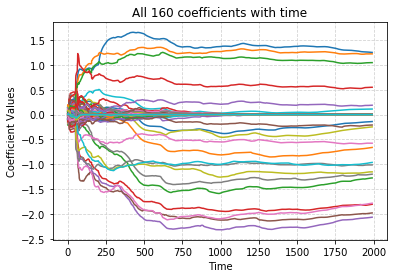

In [14]:
model.plot('coef') # model.plot() without arguments also gives the Coefficients Plot 

[[back to top]](#top)

<a name="tauplot"></a>
#### 3.C.b. Optimal  τ  Plot
This plot shows the trend of the EM decomposition parameter with time. 

True

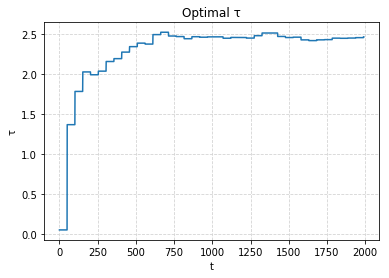

In [15]:
model.plot('tau')

[[back to top]](#top)

<a name="lambdaplot"></a>
#### 3.C.c. Optimal λ Plot

This plot shows the trend of the optimal LASSO penalty term with time. 

True

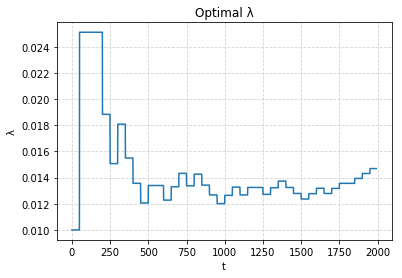

In [16]:
model.plot('lambda')

[[back to top]](#top)

<a name="traceplot"></a>
#### 3.C.d. Trace of Nonlinear Functions Plot 

As the name suggests, this plot shows the trace of the nonlinear functions.

True

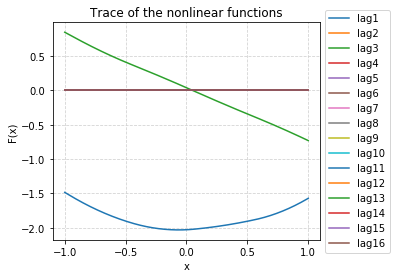

In [17]:
model.plot('trace')

[[back to top]](#top)

<a name="modparams"></a>
### 3.D. Model.model_params()

The **Model.model_params()** method returns the model parameters, such as $\lambda$ LASSO pealty term and the $\beta$ coefficients, learned during the SLANTS model fitting phase, in the form of a dictionary. This can be useful if you need to numerically verify the learned model parameters of your model.

The **Model.model_params()** takes the following arguments in its function call:

|<center>Parameter Name</center>|<center>Data Type</center>|<center>Description</center>
| :---: | :---: | :---:
| <center>filename</center> | <center>String</center> | <center>Name of the serialized model file. If a file name is provided, the model parameters are temporarily loaded and returned. 'None' by default.</center>

The **Model.model_params()** returns the following arguments:

|<center> Parameter Name |<center> Data Type             |<center> Constituents, if any                   |<center> Description                                                                                  |
|----------------|-----------------------|----------------------------------------|----------------------------------------------------------------------------------------------|
|<center> model_params   |<center> Dictionary |<center> -                                      |<center> If model parameters have been found/loaded:                                                  |
|<center> -              |<center> -                     |<center> prediction_err                         |<center> Historical predicted error; 1st column indicates 1st channel, etc.                           |
|<center> -              |<center> -                     |<center> prediction_val                         |<center> Historical predicted values; 1st column indicates 1st channel, etc.                          |
|<center> -              |<center> -                     |<center> lambda_history                         |<center> Historical lambda channels; 1st channel is the smallest one, 3rd channel is the largest one  |
|<center> -              |<center> -                     |<center> lambda_opt                             |<center> Optimized lambda; 2nd channel in lambda_history                                              |
|<center> -              |<center> -                     |<center> tau2_opt                               |<center> tau2_opt = Optimized Tau^2                                                                   |
|<center> -              |<center> -                     |<center> coef_opt                               |<center> Best coefficient, the last row and second channel related in coef_history                    |
|<center> -              |<center> -                     |<center> coef_history                           |<center> All stored coefficient                                                                       |
|<center> -              |<center> -                     |<center> spline_config                          |<center> Spline configuration                                                                         |
|<center> -              |<center> -                     |<center> sufficient_stats_A, sufficient_stats_B |<center> Sufficient statistics                                                                        |
|<center> -              |<center> -                     |<center> -                                      |<center> -                                                                                            |
|<center> -              |<center> Boolean                     |<center> -                                      |<center> If an error has occurred, returns False                                                      |

This function becomes operable as soon as the SLANTS algorithm is applied on the dataset under consideration.

Since the **Model.fit()** was called on the **Synthetic Experiment - (1)** dataset, we can now retrieve the learned model parameters using the following syntax:  

In [18]:
model.model_params()

{'lambda_history': array([[0.00398107+0.j, 0.01      +0.j, 0.02511886+0.j],
        [0.00398107+0.j, 0.01      +0.j, 0.02511886+0.j],
        [0.00398107+0.j, 0.01      +0.j, 0.02511886+0.j],
        ...,
        [0.0143245 +0.j, 0.01469179+0.j, 0.0150685 +0.j],
        [0.0143245 +0.j, 0.01469179+0.j, 0.0150685 +0.j],
        [0.0143245 +0.j, 0.01469179+0.j, 0.0150685 +0.j]]),
 'lambda_opt': array([0.01      +0.j, 0.01      +0.j, 0.01      +0.j, ...,
        0.01469179+0.j, 0.01469179+0.j, 0.01469179+0.j]),
 'tau2_opt': array([0.05516396+0.j, 0.05516396+0.j, 0.05516396+0.j, ...,
        2.46799495+0.j, 2.46799495+0.j, 2.46799495+0.j]),
 'spline_config': {'order': 3,
  'nBspline': 10,
  'knots': array([[-1.9601778 , -1.34101545],
         [-1.9601778 , -1.34101545],
         [-1.9601778 , -1.34101545],
         [-1.4545477 , -0.82251469],
         [-0.9489176 , -0.30401392],
         [-0.4432875 ,  0.21448685],
         [ 0.0623426 ,  0.73298762],
         [ 0.5679727 ,  1.25148839],
 

<ins>Note:</ins> 'coef' refers to the $\beta$ coefficients. 

[[back to top]](#top)

<a name="modreset"></a>
### 3.E. Model.reset_model()

In rare situations, the SLANTS model may not seem to work as intended due to errors (for eg: human-errors). For example, when working with multiple datasets at the same time, this problem could arise unknowingly due to the utilization of the same **Model API** object with multiple data sources. In some other cases, halting the model midway abruptly during the fitting phase may also cause the **Model** object to act in an undesired fashion.

During such scenarios, the **Model.reset_model()** may be useful to **'restart' the Model API object's normal functionality** by clearing its in-memory resources. The **Model** API object is restored to its original state (i.e., before any fitting was applied to it) without affecting the model persistent-serialized files. Thus, the use of this function is very specific, and is generally not required in normal analytical studies.

The **Model.reset_model()** functions do not take any arguments in its function call, and returns a Boolean; **False** when an error occurs, and **True** when the model is successfully reset.

This function becomes operable as soon as the SLANTS algorithm is applied on the dataset under consideration.

Upon the completion of our analytics study with the **Synthetic Experiment - (1)**, we could call the **Model.reset_model()** function to restore the object to its original state to be used for another dataset, say **Synthetic Experiment - (3)**.  

In [19]:
# Resetting the model
model.reset_model()

# loading another dataset [Synthetic Experiment - (3)], retrieving and consolidating model params 
another_exp = Experiment.load(3) 
data, predict, maximum_lag, spline_info_order, spline_info_num_Bsplines, forget_factor, lambda_init, tau2_init, sparse_lambda_tolerance, delta_multiplier, shrink_step_size, test_size, safe_shrink_lambda, random_beta = retrieve_tunable_model_params(another_exp)
optional_params, spline_info = consolidate_params(test_size, safe_shrink_lambda, random_beta, spline_info_order, spline_info_num_Bsplines)

# Fitting another dataset
model.fit(data, predict, maximum_lag, spline_info, forget_factor, 
          lambda_init, tau2_init, sparse_lambda_tolerance,
          delta_multiplier, shrink_step_size, **optional_params); # unpacking optional args; used for readability

==========< Data Preparation Finished >=============
Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 700
Iteration: 800
Iteration: 900
Iteration: 1000
Iteration: 1100
Iteration: 1200
Iteration: 1300
Iteration: 1400
Iteration: 1500
Iteration: 1600
Iteration: 1700
Iteration: 1800
Iteration: 1900
==========< Sequential Nonlinear Model finished >=============


[[back to top]](#top)

<a name="modhelp"></a>
### 3.F. Model.help()

There may be circumstances wherein you may **not have access to the 'slants' Python API documentation**. It could also be that you are using a **REPL interactive environment** and would prefer to **view the 'slants' Python API documentation in the console on-the-fly**. Or you might just find it annoying to refer the entire 'slants' Python API documentation sheet, just to refer some sytatical element or function parameters of the package.

In attempt to keep the 'slants' package self-contained, the **Model.help()** method was designed **to faciltate the access of documentation pertaining to the Model Class API**. In essence, this method is simply a wrapper on the help() Python function in order to provide the documentation information slightly more conveniently to you. 

The **Model.help()** function takes the following arguments in its function call:

|<center> Parameter Name |<center> Data Type |<center> Valid Values |<center> Description                                                                       |
|----------------|-----------|----------------------|-----------------------------------------------------------------------------------|
|<center> method         |<center> String    |<center> -                    |<center> Method name whose documentation is required. Possible values:                     |
|<center> -              |<center> -         |<center> fit                  |<center> Fit SLANTS model, default value of parameter                                      |
|<center> -              |<center> -         |<center> model_params         |<center> Retrieve SLANTS model parameters                                                  |
|<center> -              |<center> -         |<center> plot                 |<center> View diagnostic plots                                                             |
|<center> -              |<center> -         |<center> reset_model          |<center> Reset model in case of problems                                                   |
|<center> -              |<center> -         |<center> help                 |<center> Display information of help method                                                |
|<center> -              |<center> -         |<center> all                  |<center> Display entire documentation of class                                             |
|<center> ls             |<center> Boolean   |<center> -                    |<center> Shows the list of available methods, if True. Default value of parameter is False |

The **Model.help()** function returns a Boolean to indicate if an error/warning occurred (False) or not (True).

Here are the list of features the **Model.help()** can provide you with:

[[back to top]](#top)

<a name="helpls"></a>
#### 3.F.a. Show List of Available Methods in Model Class API

In [20]:
model.help(ls=True)

Here are the list of available methods: 
	 fit | help | model_params | plot | reset_model


True

[[back to top]](#top)

<a name="helpdoc"></a>
#### 3.F.b. View Documentation of Model Class API

By default, a mini-documentation of the **Model.fit()** function will be displayed. This Linux-inspired man-style documentation primarily displays the required/optional arguments to the function and the function return-value along with its function signature.

In [21]:
model.help('fit') # model.help() defaults to this call

Help on method fit in module slants.api:

fit(data, predict, maximum_lag, spline_info, forget_factor, lambda_init, tau2_init, sparse_lambda_tolerance, delta_multiplier, shrink_step_size, online=True, debug_print=False, test_size=50, idle_tau2_tolerance=50, safe_shrink_lambda=2.51188643150958, zero_coef_tolerance=3, shrink_tau2=1.1, random_beta=False) method of slants.api.Model instance
    Fits the SLANTS model on data
            Note: Data is automatically prepared (standardized + transformed as in the D̃ = Dl step in the paper). Splines are also inherently handled
    
    Expected Args: {format - [type, description]}
            data: Numpy array; Original data matrix, X
            predict: Scalar; Column to indicate the random variable to be predicted
            maximum_lag: Scalar; Maximum lag, L, to be considered
            spline_info: Dictionary; initial spline configuration containing 'order' and 'num_Bsplines'
            forget_factor: Numpy vector; comprising ideally de

True

In [22]:
model.help('plot') # Show documentation of plot function

Help on method plot in module slants.api:

plot(kind='coef') method of slants.api.Model instance
    Graphs a type of plot associated with the model to track the tuning parameters  
    
    Expected Args:
            kind: Type of requested plot to be graphed using the model parameters. At the moment, 4 types of plot can be created:
                    (1) lambda = Optimal Lambda Plot
                    (2) tau = Optimal Tau Plot
                    (3) coef = Coefficient-Time Plot
                    (4) trace = Trace of the nonlinear functions
    
    
    Returns:
            False, if a type mismatch occurs



True

[[back to top]](#top)

<a name="helpclass"></a>
#### 3.F.c. View Documentation of the Entire Class

In [23]:
model.help('all')

Help on Model in module slants.api object:

class Model(builtins.object)
 |  Utility Class for the Raw Implementation of the SLANTS algorithm
 |  
 |  Description:
 |          Provisions the underlying logic behind the building blocks of the algorithm, such as the data preprocessing and Glasso EM steps
 |  
 |  Methods defined here:
 |  
 |  fit(self, data, predict, maximum_lag, spline_info, forget_factor, lambda_init, tau2_init, sparse_lambda_tolerance, delta_multiplier, shrink_step_size, online=True, debug_print=False, test_size=50, idle_tau2_tolerance=50, safe_shrink_lambda=2.51188643150958, zero_coef_tolerance=3, shrink_tau2=1.1, random_beta=False)
 |      Fits the SLANTS model on data
 |              Note: Data is automatically prepared (standardized + transformed as in the D̃ = Dl step in the paper). Splines are also inherently handled
 |      
 |      Expected Args: {format - [type, description]}
 |              data: Numpy array; Original data matrix, X
 |              predict:

True

[[back to top]](#top)

<a name="helpprompt"></a>
#### 3.F.d. Interactive Prompt
If by mistake an incorrect method name was passed, a list of the available **Model Class** API methods are displayed on the screen and at the same an interactive prompt will ask you for your opinion. 

In [24]:
model.help('reset_models')

<WARNING> Looks like "reset_models"" method does not exist. Here are the list of available methods: 
	 fit | help | model_params | plot | reset_model
Were you looking to check the entire class documentation instead? (y/n)n
<WARNING> Try again with one of the valid methods listed above.


False

[[back to top]](#top)

<a name="conc"></a>
### 4. Conclusion - To Wrap Things Up 

**Thank you for your time in referring to this comprehensive documentation!** In this process, we hope you, as the user, would have gained some hands-on experience with **'slants' API** so as to make you confident to use the API as you need. 

[[back to top]](#top)